## Lets Ufo Baby

#### Get the libs for this project:

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt

#### Load Files

In [3]:
# pandas data frame from cites in a csv
df = pd.read_csv("data/ufo_data.csv")

ParserError: Error tokenizing data. C error: Expected 7 fields in line 1688, saw 8


We need to convert the lat/lon columns to a `geometry` data type. A `Point` to be more specific. Using our csv file and the dataframe (`df1`), we create a `geodataframe` (`gdf1`) using the coordinates in `df1`

In [45]:
gdf1 = gpd.GeoDataFrame(
     df1, geometry=gpd.points_from_xy(df1.lon, df1.lat))
gdf1.head()

,city,growth,lat,lon,population,rank,state,geometry
0,New York,4.8,40.712784,-74.005941,8405837,1,New York,POINT (-74.00594 40.71278)
1,Los Angeles,4.8,34.052234,-118.243685,3884307,2,California,POINT (-118.24368 34.05223)
2,Chicago,-6.1,41.878114,-87.629798,2718782,3,Illinois,POINT (-87.62980 41.87811)
3,Houston,11.0,29.760427,-95.369803,2195914,4,Texas,POINT (-95.36980 29.76043)
4,Philadelphia,2.6,39.952584,-75.165222,1553165,5,Pennsylvania,POINT (-75.16522 39.95258)


However! Reading in the geojson file already has the correct `Point` `geometry` done for us! So from here on down, we could use either `gdf1` or `gdf2`

In [94]:
gdf2.head()

,city,growth,population,rank,state,marker-color,marker-size,geometry
0,Portland,15.0,609456,29,Oregon,#879CB9,medium,POINT (-122.67648 45.52306)
1,Seattle,15.6,652405,21,Washington,#14F334,medium,POINT (-122.33207 47.60621)
2,Los Angeles,4.8,3884307,2,California,#5F2B67,medium,POINT (-118.24368 34.05223)
3,Boise City,9.5,214237,98,Idaho,#94EEF1,medium,POINT (-116.21461 43.61871)
4,Las Vegas,24.5,603488,30,Nevada,#F3E40F,medium,POINT (-115.13983 36.16994)


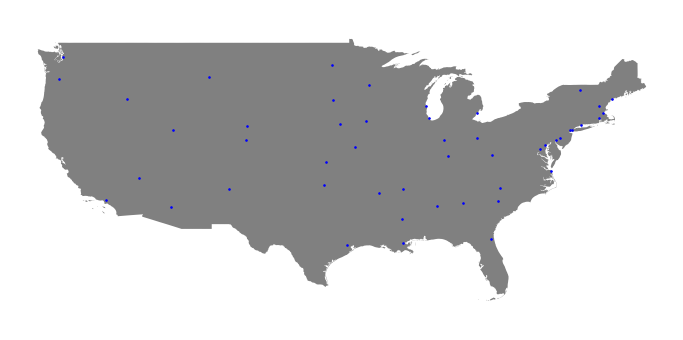

In [89]:

#boundary = gpd.read_file("data/us_nation_border.geojson")
boundary = gpd.read_file("data/us_border_shp/us_border.shp")
fig, ax = plt.subplots(figsize=(12, 6))
boundary.plot(ax=ax, color="gray")
gdf2.plot(ax=ax, markersize=2.5, color="blue")
ax.axis("off")
plt.axis('equal')

# minx, miny, maxx, maxy = gdf2.total_bounds
# print(minx,miny,maxx,maxy)
# ax.set_xlim(minx-5, maxx+5)
# ax.set_ylim(miny, maxy)
plt.show()

Must ensure that the coords are of the correct "projection" type. 

In [90]:
boundary = boundary.to_crs(epsg=3395)
gdf_proj = gdf2.to_crs(boundary.crs)


Convert the "points" to "coords". See the values after the cell to see the difference!

In [99]:
boundary_shape = unary_union(boundary.geometry)

coords = points_to_coords(gdf_proj.geometry)
 

Create the Voronoi diagram...

In [95]:
region_polys, region_pts = voronoi_regions_from_coords(coords, boundary_shape)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/geovoronoi/_voronoi.py:143: ShapelyDeprecationWarning: The proxy geometries (through the 'asShape()', 'asPoint()' or 'PointAdapter()' constructors) are deprecated and will be removed in Shapely 2.0. Use the 'shape()' function or the standard 'Point()' constructor instead.
  pts = coords_to_points(coords)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/geovoronoi/_voronoi.py:202: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  geom_polys, geom_pts = region_polygons_from_voronoi(vor, geom, return_point_assignments=True, **kwargs)
Exception ignored in: <function BaseGeometry.__del__ at 0x7fd611635af0>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/shapely/geometry/base.py", line 209, in __del__
    #     case

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


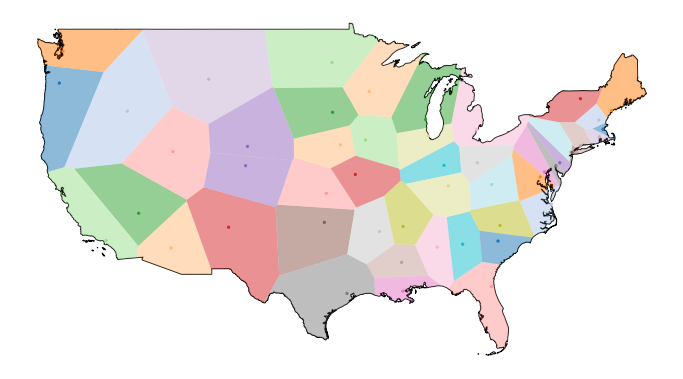

In [97]:
fig, ax = subplot_for_map(figsize=(12, 10))
# gdf1.plot(ax=ax, markersize=2.5, color="blue")
plot_voronoi_polys_with_points_in_area(ax, boundary_shape, region_polys, coords, region_pts)
plt.show()

Traverse the "polygons" created. We could now turn those into a "feature list" to display on `geojson.io` or load each polygon into a spatial index to run queries with them (like find UFO's that are in each polygon). 

In [ ]:
for i,poly in region_polys.items():
    print(poly)